In [ ]:
App Rating Prediction

1.Load the data file using pandas.

In [914]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
os.getcwd()
os.chdir('/Users/akhil/Downloads')
google=pd.read_csv('googleplaystore.csv')
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [915]:
google.shape

(10841, 13)

In [916]:
google.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


2.Check for null values in the data. Get the number of null values for each column.

In [917]:
google.isnull().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

3.Drop records with nulls in any of the columns. 

In [918]:
google.dropna(inplace=True)
google.shape

(9360, 13)

In [919]:
google.describe()

,Rating
count,9360.000000
mean,4.191838
std,0.515263
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


4.Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

4.1 Size column has sizes in Kb as well as Mb. Need to find "M" in "Size" column.

In [920]:
google['find_M']=google['Size'].str.find("M")
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,find_M
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,3


Replacing all string and other characters and extract the numeric value from the column.

In [921]:
google['Size']=google['Size'].str.replace("k","").str.replace("M","").str.replace("Varies with device","0").str.replace("+","").str.replace(",","")
google.head()

<ipython-input-921-59f8681c7741>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  google['Size']=google['Size'].str.replace("k","").str.replace("M","").str.replace("Varies with device","0").str.replace("+","").str.replace(",","")


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,find_M
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,3


Convert values into numeric and using info(),checking whether data type of Size column has changed to numeric

In [922]:
google['Size']=google['Size'].astype('float')
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
 13  find_M          9360 non-null   int64  
dtypes: float64(2), int64(1), object(11)
memory usage: 1.1+ MB


Multiply the value by 1,000, if size is mentioned in Mbimport numpy as np

In [923]:
google['Size']=np.where(google['find_M']>-1,google['Size']*1000,google['Size'])
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,find_M
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,3


4.2 Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [924]:
google['Reviews']=google['Reviews'].astype('int')

4.3 Installs field is currently stored as string and has values like 1,000,000+. Treat 1,000,000+ as 1,000,000, remove ‘+’, ‘,’ from the field, convert it to integer

In [925]:
google['Installs']=google['Installs'].str.replace("+","").str.replace(",","").str.replace("Free","0")
google.head()

<ipython-input-925-0bd4bb07c49f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  google['Installs']=google['Installs'].str.replace("+","").str.replace(",","").str.replace("Free","0")


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,find_M
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,3


Convert values into numeric

In [926]:
google['Installs']=google['Installs'].astype('int')

4.4 Price field is a string and has '$' symbol. Remove ‘$’ sign, and convert it to numeric.

In [927]:
google['Price']=google['Price'].str.replace("$","").str.replace(",","")
google.head()

<ipython-input-927-7e90853bdd52>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  google['Price']=google['Price'].str.replace("$","").str.replace(",","")


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,find_M
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,3


Convert values into numeric and using info(),checking whether data type of Price column has changed to numeric

In [928]:
google['Price']=google['Price'].astype('float')
google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
 13  find_M          9360 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 1.1+ MB


5. Sanity checks:
5.1 Average rating should be between 1 and 5 as only these values are allowed on the play store. 
Drop the rows that have a value outside this range.

In [929]:
rating_invalid=google[(google['Rating']>5)|(google['Rating']<1)]
rating_invalid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,find_M


5.2 Reviews should not be more than installs as only those who installed can review the app.
If there are any such records, drop them.

In [930]:
google=google[~(google['Reviews']>google['Installs'])]

In [931]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,find_M
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,3


5.3 For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [932]:
google[(google['Type'] == 'Free') & (google['Price']>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,find_M


6. Performing univariate analysis: 
6.1 Boxplot for Price
Are there any outliers? Think about the price of usual apps on Play Store.

{'whiskers': [<matplotlib.lines.Line2D at 0x1557f3af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1556681f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1557f3790>],
 'medians': [<matplotlib.lines.Line2D at 0x1556688b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x155668c10>],
 'means': []}

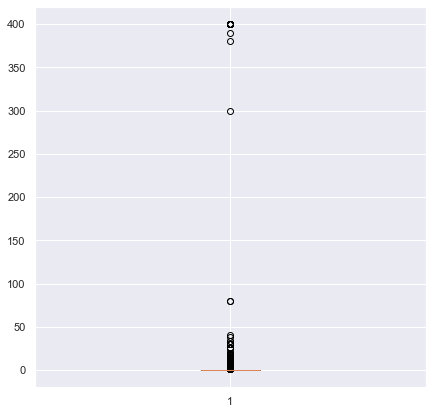

In [933]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,7))
plt.boxplot(google.Price)

/Users/akhil/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

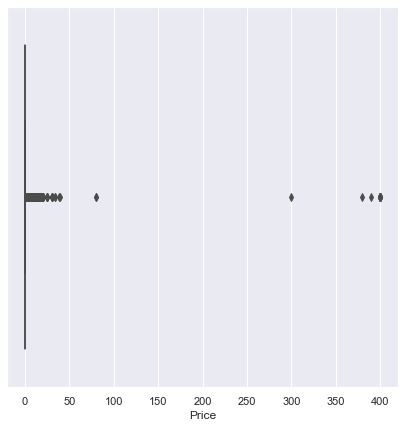

In [934]:
plt.figure(figsize=(7,7))
sns.boxplot(google.Price)

INFERENCES
From the boxplots above, it's clear theat price has outliers.
Those apps over $50 seems to be outliers.

6.2 Boxplot for Reviews
Are there any apps with very high number of reviews? Do the values seem right?

{'whiskers': [<matplotlib.lines.Line2D at 0x155e594f0>,
 'caps': [<matplotlib.lines.Line2D at 0x155e59a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x155e591f0>],
 'medians': [<matplotlib.lines.Line2D at 0x155e650d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x155e65430>],
 'means': []}

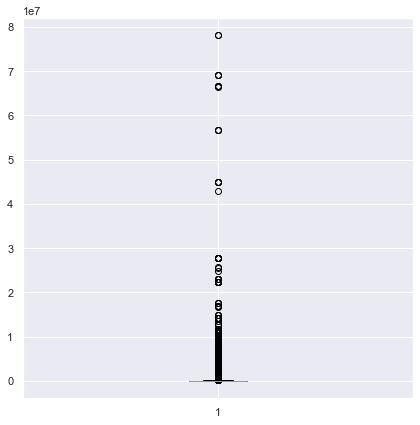

In [935]:
plt.figure(figsize=(7,7))
plt.boxplot(google.Reviews)

/Users/akhil/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

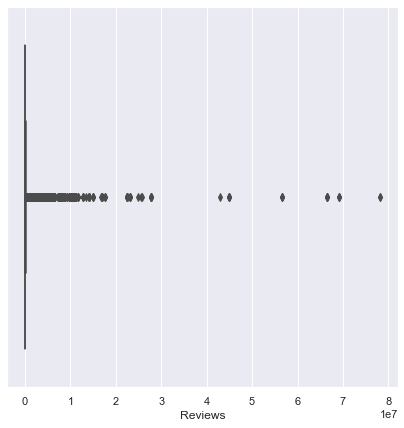

In [936]:
plt.figure(figsize=(7,7))
sns.boxplot(google.Reviews)

In [937]:
google["Reviews"].describe()

count    9.353000e+03
mean     5.147606e+05
std      3.146169e+06
min      1.000000e+00
25%      1.870000e+02
50%      5.967000e+03
75%      8.174700e+04
max      7.815831e+07
Name: Reviews, dtype: float64

INFERENCES
From the boxplots above, it's clear theat reviews has outliers.
The mean of Reviews is 514760.6 with a standard deviation of 314616 between values.
This seems as a large discrepancy between values, and perhaps several outliers.

6.3 Histogram for Rating
How are the ratings distributed? Is it more toward higher ratings?

Text(0, 0.5, '\nFrequency\n')

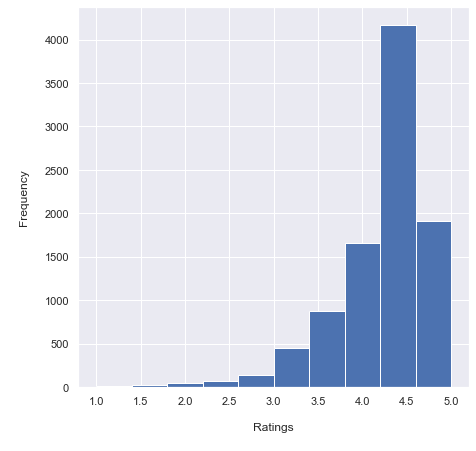

In [938]:
plt.figure(figsize=(7,7))
plt.hist(google.Rating)
plt.xlabel('\nRatings\n', fontsize = 12)
plt.ylabel('\nFrequency\n', fontsize = 12)

INFERENCES
Histogram above shows that it has a negative skew since it has a long tail in the negative direction and it's clear that most apps lean towards higher ratings.

6.4 Histogram for Size
Note down your observations for the plots made above. Which of these seem to have outliers?

Text(0, 0.5, '\nFrequency\n')

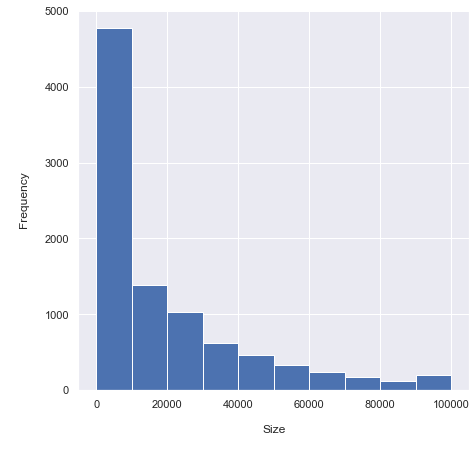

In [939]:
plt.figure(figsize=(7,7))
plt.hist(google.Size)
plt.xlabel('\nSize\n', fontsize = 12)
plt.ylabel('\nFrequency\n', fontsize = 12)

INFERENCES
Histogram above shows that it has a positive skew since it has a long tail in the positive direction
and it's clear that most apps' size are below 20,000.

7. Outlier treatment: 

7.1 Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
Check out the records with very high price
a)Is 200 indeed a high price?
b)Drop these as most seem to be junk apps

In [940]:
price_high=google[google["Price"]>200].index
price_high

Int64Index([4197, 4362, 4367, 5351, 5354, 5355, 5356, 5357, 5358, 5359, 5362,
            5364, 5366, 5369, 5373],
           dtype='int64')

In [941]:
google.drop(price_high,inplace=True)

In [942]:
google.shape

(9338, 14)

7.2 Reviews: Very few apps have very high number of reviews. 
These are all star apps that don’t help with the analysis and, in fact, will skew it. 
Drop records having more than 2 million reviews.

In [943]:
reviews_high=google[google["Reviews"]>2000000].index
reviews_high

Int64Index([  139,   335,   336,   338,   340,   341,   342,   344,   345,
              347,
            ...
             8658,  8894,  8896,  9140,  9142,  9166,  9841, 10186, 10190,
            10327],
           dtype='int64', length=453)

In [944]:
google.drop(reviews_high, inplace=True)
google.shape

(8885, 14)

7.3 Installs:  There seems to be some outliers in this field too. 
Apps having very high number of installs should be dropped from the analysis.
Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

In [945]:
np.percentile(google.Installs,10)

1000.0

In [946]:
np.percentile(google.Installs,25)

10000.0

In [947]:
np.percentile(google.Installs,50)

500000.0

In [948]:
np.percentile(google.Installs,70)

1000000.0

In [949]:
np.percentile(google.Installs,90)

10000000.0

In [950]:
np.percentile(google.Installs,95)

10000000.0

In [951]:
np.percentile(google.Installs,99)

100000000.0

7.4 Decide a threshold as cutoff for outlier and drop records having values more than that.
Threshold=99 percentile.

In [952]:
Installs_high=google[google["Installs"]>100000000].index
Installs_high

Int64Index([ 152, 3265, 3326, 3473, 3476, 3533, 3562, 3569, 3574, 3687, 3736,
            3755, 3765, 3767, 3816, 3819, 4048, 4147, 5596, 9844],
           dtype='int64')

In [953]:
google.drop(Installs_high, inplace=True)

In [954]:
google.shape

(8865, 14)

8.Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

8.1 Make scatter plot/joinplot for Rating vs. Price
What pattern do you observe? Does rating increase with price?

Text(0.5, 1.0, 'Rating vs. Price')

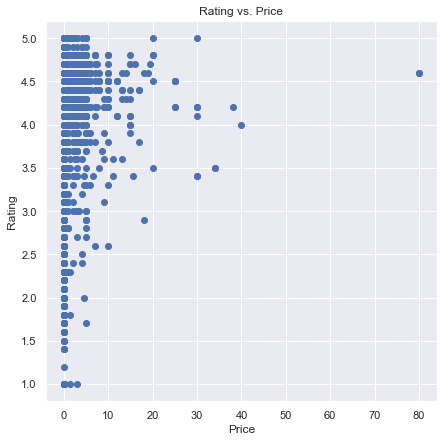

In [955]:
plt.figure(figsize=(7,7))
plt.scatter(google.Price,google.Rating)
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title('Rating vs. Price')

/Users/akhil/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Rating vs Price of Apps')

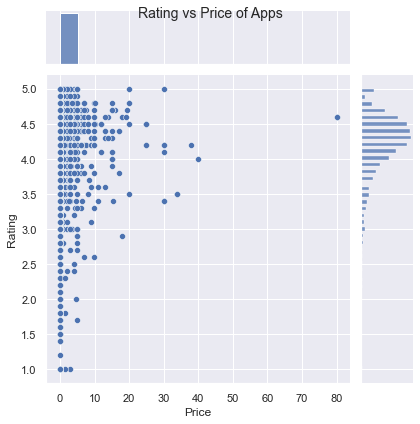

In [956]:
rs=sns.jointplot(google.Price,google.Rating)
rs.fig.suptitle("Rating vs Price of Apps",fontsize=14 )


INFERENCES
From the scatter & joint plots above, it is clear that Price does not mean better ratings. There is no clear pattern that paid apps get better ratings. 
Most data concentrates within Ratings 4.0 to 5.0 and Price between 0 and 10.

8.2 Make scatter plot/joinplot for Rating vs. Size
Are heavier apps rated better?

Text(0.5, 1.0, 'Rating vs.Size')

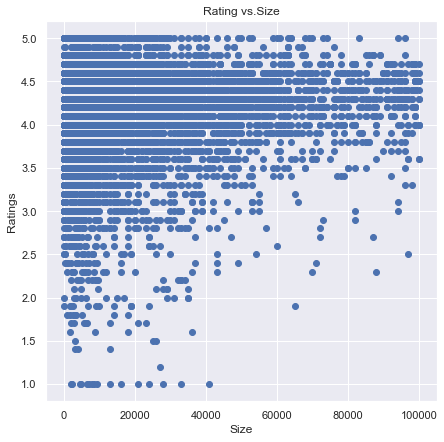

In [957]:
plt.figure(figsize=(7,7))
plt.scatter(google.Size,google.Rating)
plt.xlabel("Size")
plt.ylabel("Ratings")
plt.title('Rating vs.Size')


/Users/akhil/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Rating vs Size of Apps')

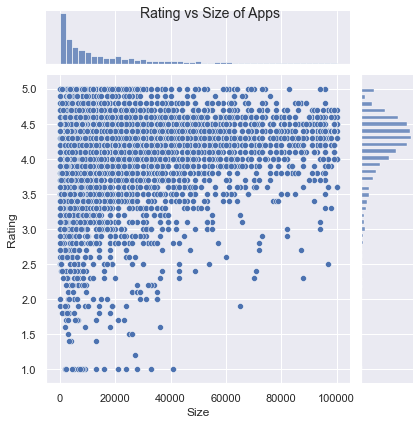

In [958]:
rs=sns.jointplot(google.Size,google.Rating)
rs.fig.suptitle("Rating vs Size of Apps",fontsize=14)

INFERENCES
This scatterplot also shows that increase in size does not ensure high rating. 
But heavy apps are mostly rated better as compared to lighter apps.

8.3 Make scatter plot/joinplot for Rating vs. Reviews
Does more review mean a better rating always?

Text(0.5, 1.0, 'Rating vs.Reviews')

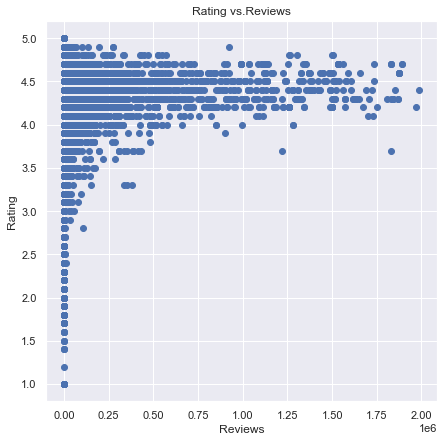

In [959]:
plt.figure(figsize=(7,7))
plt.scatter(google.Reviews,google.Rating)
plt.xlabel("Reviews")
plt.ylabel("Rating")
plt.title('Rating vs.Reviews')

INFERENCES
No clear pattern. 
There are fewer low rated apps among the popular ones (maybe poor ones won’t get so popular)
after a certain point, the rating does not depend on the popularity.

8.4 Make boxplot for Rating vs. Content Rating
Is there any difference in the ratings? Are some types liked better?

In [960]:
google.rename(columns = {'Content Rating':'Content_Rating'}, inplace = True)
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver,find_M
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,3


<AxesSubplot:xlabel='Content_Rating', ylabel='Rating'>

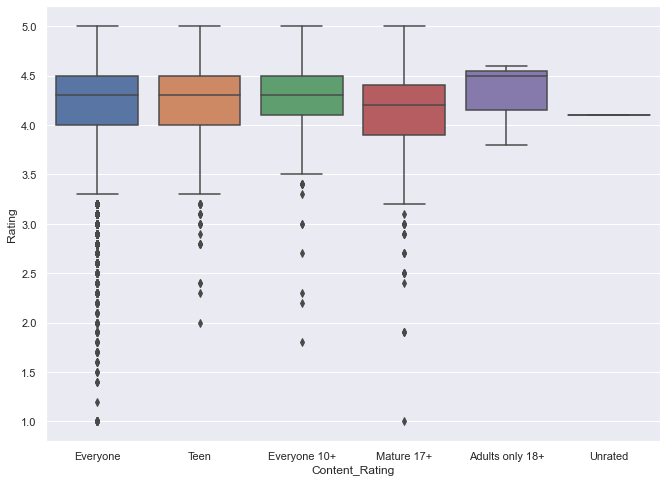

In [961]:
sns.set(rc={'figure.figsize':(11,8)})
sns.boxplot(x =google.Content_Rating ,y=google.Rating)

INFERENCES
Most ratings are overlapping.
The distributions of Rating between the different Content Rating categories have a significant overlap.There does not seem to be a difference between Content Ratings in relation to Ratings.
The rating for “Adults Only 18+” is the highest. 


8.5 Make boxplot for Ratings vs. Category
Which genre has the best ratings?

[Text(0, 0, 'ART_AND_DESIGN'),
 Text(1, 0, 'AUTO_AND_VEHICLES'),
 Text(2, 0, 'BEAUTY'),
 Text(3, 0, 'BOOKS_AND_REFERENCE'),
 Text(4, 0, 'BUSINESS'),
 Text(5, 0, 'COMICS'),
 Text(6, 0, 'COMMUNICATION'),
 Text(7, 0, 'DATING'),
 Text(8, 0, 'EDUCATION'),
 Text(9, 0, 'ENTERTAINMENT'),
 Text(10, 0, 'EVENTS'),
 Text(11, 0, 'FINANCE'),
 Text(12, 0, 'FOOD_AND_DRINK'),
 Text(13, 0, 'HEALTH_AND_FITNESS'),
 Text(14, 0, 'HOUSE_AND_HOME'),
 Text(15, 0, 'LIBRARIES_AND_DEMO'),
 Text(16, 0, 'LIFESTYLE'),
 Text(17, 0, 'GAME'),
 Text(18, 0, 'FAMILY'),
 Text(19, 0, 'MEDICAL'),
 Text(20, 0, 'SOCIAL'),
 Text(21, 0, 'SHOPPING'),
 Text(22, 0, 'PHOTOGRAPHY'),
 Text(23, 0, 'SPORTS'),
 Text(24, 0, 'TRAVEL_AND_LOCAL'),
 Text(25, 0, 'TOOLS'),
 Text(26, 0, 'PERSONALIZATION'),
 Text(27, 0, 'PRODUCTIVITY'),
 Text(28, 0, 'PARENTING'),
 Text(29, 0, 'WEATHER'),
 Text(30, 0, 'VIDEO_PLAYERS'),
 Text(31, 0, 'NEWS_AND_MAGAZINES'),
 Text(32, 0, 'MAPS_AND_NAVIGATION')]

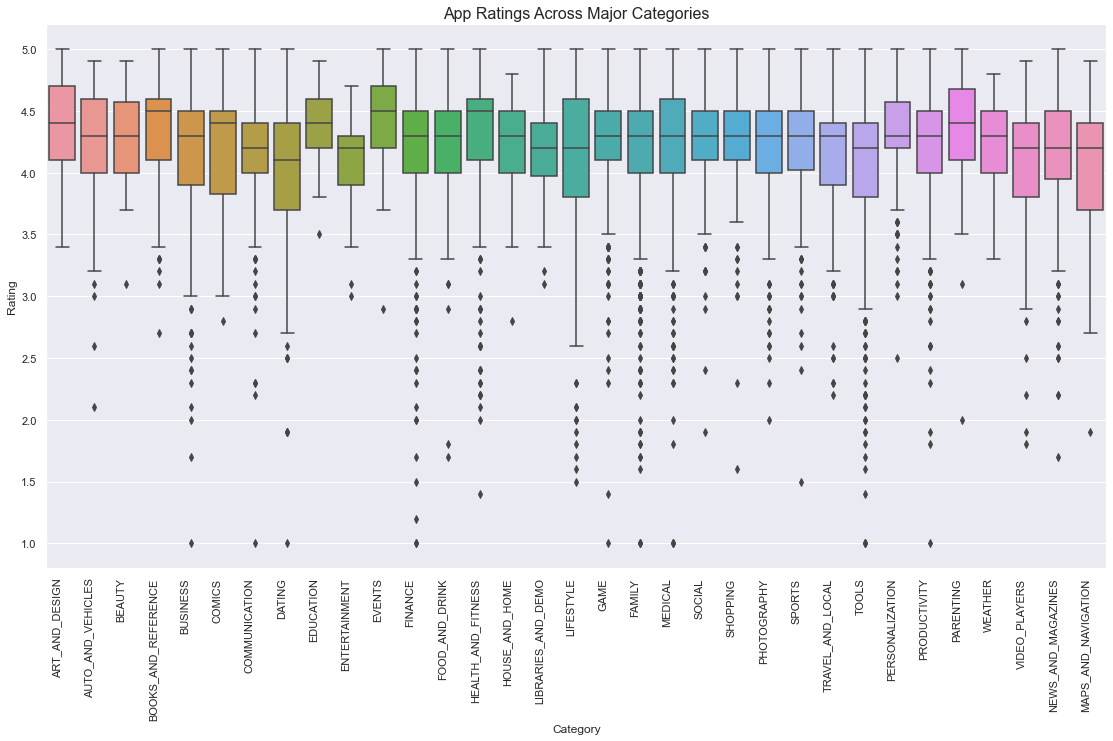

In [962]:
sns.set(rc={'figure.figsize':(19,10)})
plt.title("App Ratings Across Major Categories", fontsize=16)
ax=sns.boxplot(x =google.Category,y=google.Rating)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

INFERENCES
The genre Events has the best ratings.
The distribution of the Ratings between the different types of Category is distinct 
enough to take Category as a potential good predictor of Ratings

9. Data preprocessing
Create a copy of the dataframe to make all the edits. Name it inp1.
9.1 Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. 
Apply log transformation (np.log1p) to Reviews and Installs.

In [963]:
inp1=google.copy()

(array([7689.,  481.,  240.,  119.,   94.,   87.,   61.,   55.,   18.,
          21.]),
 array([1.0000000e+00, 1.9860770e+05, 3.9721440e+05, 5.9582110e+05,
        7.9442780e+05, 9.9303450e+05, 1.1916412e+06, 1.3902479e+06,
        1.5888546e+06, 1.7874613e+06, 1.9860680e+06]),
 <BarContainer object of 10 artists>)

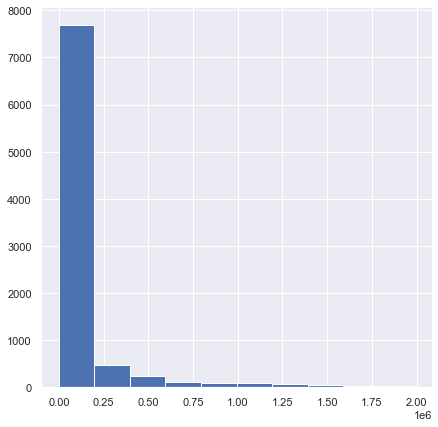

In [964]:
plt.figure(figsize=(7,7))
plt.hist(inp1.Reviews)

In [965]:
inp1['Reviews_Log'] = np.log1p(inp1.Reviews)

(array([ 434.,  765.,  859.,  918.,  901., 1018., 1190., 1253.,  961.,
         566.]),
 array([ 0.69314718,  2.07399925,  3.45485132,  4.83570339,  6.21655545,
         7.59740752,  8.97825959, 10.35911166, 11.73996373, 13.1208158 ,
        14.50166787]),
 <BarContainer object of 10 artists>)

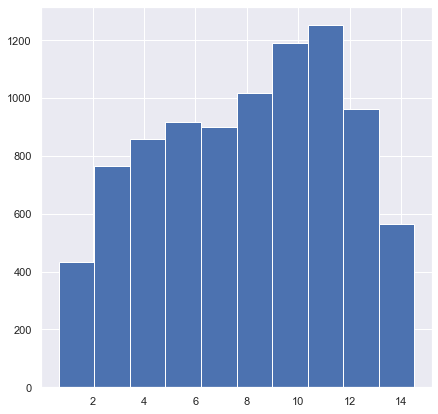

In [966]:
plt.figure(figsize=(7,7))
plt.hist(inp1['Reviews_Log'])

(array([8496.,    0.,    0.,    0.,  247.,    0.,    0.,    0.,    0.,
         122.]),
 array([5.00000000e+00, 1.00000045e+07, 2.00000040e+07, 3.00000035e+07,
        4.00000030e+07, 5.00000025e+07, 6.00000020e+07, 7.00000015e+07,
        8.00000010e+07, 9.00000005e+07, 1.00000000e+08]),
 <BarContainer object of 10 artists>)

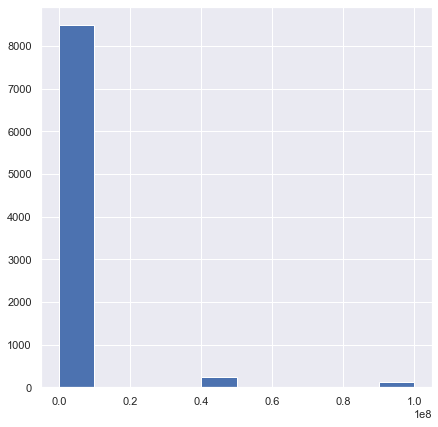

In [967]:
plt.figure(figsize=(7,7))
plt.hist(inp1.Installs)

In [968]:
inp1['Installs_Log'] = np.log1p(inp1.Installs)

(array([  75.,  364.,  201.,  708., 1431., 1614.,  537., 1576., 1990.,
         369.]),
 array([ 1.79175947,  3.4546516 ,  5.11754373,  6.78043585,  8.44332798,
        10.10622011, 11.76911224, 13.43200437, 15.0948965 , 16.75778863,
        18.42068075]),
 <BarContainer object of 10 artists>)

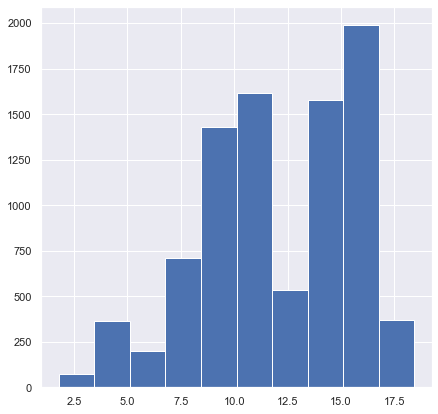

In [969]:
plt.figure(figsize=(7,7))
plt.hist(inp1['Installs_Log'])

9.2.Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [970]:
inp1.drop(["App","Last Updated","Current Ver","Android Ver"],axis=1,inplace=True)

In [971]:
inp1.drop(['Type'], axis = 1,inplace=True)

9.3 Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. 
Name of dataframe should be inp2.

In [972]:
inp2 = pd.get_dummies(inp1,prefix_sep='_',columns=['Category','Genres','Content_Rating'])
inp2.head()

,Rating,Reviews,Size,Installs,Price,find_M,Reviews_Log,Installs_Log,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content_Rating_Adults only 18+,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated
0,4.1,159,19000.0,10000,0.0,2,5.075174,9.210440,1,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,14000.0,500000,0.0,2,6.875232,13.122365,1,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,8700.0,5000000,0.0,3,11.379520,15.424949,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4.5,215644,25000.0,50000000,0.0,2,12.281389,17.727534,1,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,967,2800.0,100000,0.0,3,6.875232,11.512935,1,0,...,0,0,0,0,0,1,0,0,0,0


In [973]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'find_M',
       'Reviews_Log', 'Installs_Log', 'Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES',
       ...
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word', 'Content_Rating_Adults only 18+',
       'Content_Rating_Everyone', 'Content_Rating_Everyone 10+',
       'Content_Rating_Mature 17+', 'Content_Rating_Teen',
       'Content_Rating_Unrated'],
      dtype='object', length=162)

10. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [974]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)

In [975]:
df_train.shape, df_test.shape

((6205, 162), (2660, 162))

11. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [976]:
y_train = df_train.pop("Rating")
X_train = df_train

In [977]:
y_test = df_test.pop('Rating')
X_test = df_test

12) Model building

12.1 Use linear regression as the technique

In [978]:
from sklearn.linear_model import LinearRegression
LinearRegression_inp2 = LinearRegression().fit(X_train,y_train)
print(LinearRegression_inp2.intercept_)
print(LinearRegression_inp2.coef_)

4.651384956145726
[-9.84735858e-08 -1.74437728e-07  3.34755084e-09 -4.83407065e-03
  9.68403715e-03  1.78573768e-01 -1.53499291e-01  4.19967572e-01
 -4.35065478e-03  1.00670577e-01  4.71758185e-02 -4.09675154e-02
  1.53076870e-01 -7.06370834e-02 -1.19297158e-01 -6.88971194e-02
 -1.76593432e-01  1.32381082e-01 -5.01221647e-02 -4.97275290e-02
 -4.55852575e-02  1.07033538e-01 -1.36974625e-02 -4.20848641e-03
  1.97423923e-02 -5.41263713e-02 -8.71038604e-02  5.46249950e-05
 -5.87010365e-02  8.68233467e-02  2.82356161e-02 -5.20001724e-02
 -3.29501716e-02 -1.93893698e-02 -3.15355704e-02  6.11668921e-02
 -3.82062365e-02 -5.03977501e-02 -8.08761625e-02 -6.95776855e-03
 -2.05159380e-01  1.55167656e-02 -2.31155403e-01 -1.39377139e-01
  5.19203944e-10 -2.75031901e-01 -1.81425189e-01  3.59111752e-02
  2.21916701e-01 -2.13711856e-01 -5.14893213e-02 -3.97696631e-01
 -4.35065411e-03  1.00670577e-01 -1.86943039e-01 -2.32695060e-01
  1.03485055e-01  4.96262476e-11  4.71758192e-02 -5.21111380e-01
 -4.096

12.2 Report the R2 on the train set

In [979]:
R2_train=round(LinearRegression_inp2.score(X_train,y_train),3)
R2_train

0.166

13)Make predictions on test set and report R2.

In [980]:
R2_test=round(LinearRegression_inp2.score(X_test,y_test),3)
R2_test

0.145

In [981]:
Predicted_ratings = LinearRegression_inp2.predict(X_test)
inp2_predicted = pd.concat([X_train,pd.DataFrame(Predicted_ratings,columns=['Pred_ratings']),y_test],axis=1)
inp2_predicted

inp2_predicted['Error_pct'] = abs(inp2_predicted.Rating-inp2_predicted.Pred_ratings)/inp2_predicted.Rating


import numpy as np
np.mean(inp2_predicted.Error_pct)

acc_rate = 1-np.mean(inp2_predicted.Error_pct)
acc_rate

0.912801984222602

In [982]:
print('Root Mean Squared Error=',np.sqrt(ms(y_test,Predicted_ratings)))
print('Prediction Error Percentage is',round((0.50/np.mean(y_test))*100))

Root Mean Squared Error= 0.489030436411683
Prediction Error Percentage is 12


INFERENCES
The prediction error RMSE (Root Mean Squared Error), representing the average difference between the observed known outcome values in the test data and the predicted outcome seems to be 0.49 which is very good thus represents the error rate of 12%.The lower the RMSE, the better the model. 
We can predict app rating but significant preprocessing must be done before the regression process.Observed and the predicted outcome values are highly correlated, which is very good.

